## Pendahuluan


Wabah virus Corona sudah melanda Indonesia semenjak awal 2019. Dalam jangka waktu tersebut, banyak dinamika yang terjadi.

Pada kasus kali ini, data yang di berikan oleh kementrian kesehatan pada acara Finance and Healt Hackathon adalah data terkait aplikasi Peduli Lindungi untuk dianalisa agar bisa menyelesaikan masalah yang ada.

Dari beberapa dataset yang disediakan, tim kami memilih data kesehatan yaitu Data Checkin Peduli Lindungi yang disediakan oleh kementrian kesehatan.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_pl=pd.read_csv('Peduli_Lindungi_Checkin_Hackathon.csv')

In [3]:
df_pl.head()


,nik_hashed,user_covid19_status,gender,checkin_timestamp,checkout_timestamp,province_dagri_code,province_name,city_dagri_code,city_name,outlet_category,outlet_sub_category,user_color_status
0,93e255c026f7f4ed4a663daf884daac4a3caec8e569f4e...,NOT POSITIVE,MALE,2022-03-28 12:24:26 UTC,2022-03-28 12:40:57 UTC,34,DAERAH ISTIMEWA YOGYAKARTA,3404,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN
1,0fdffd869355f5473f4ef62a18ba15ae49aaa6131be12d...,NOT POSITIVE,FEMALE,2022-03-28 12:26:16 UTC,2022-03-28 17:59:50 UTC,32,JAWA BARAT,3201,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN
2,2b84a93837c40487dc60b0a02b9f5e7db5c6519c4d95d2...,NOT POSITIVE,MALE,2022-03-28 12:52:00 UTC,2022-03-28 13:55:52 UTC,16,SUMATERA SELATAN,1671,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN
3,681b4354b148a8424a69a8956a06d840b2fccd0d79821f...,NOT POSITIVE,MALE,2022-03-28 12:53:13 UTC,2022-03-28 13:28:30 UTC,34,DAERAH ISTIMEWA YOGYAKARTA,3404,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN
4,965891cbdd3406e1f421361874fdbe3550c52b6647923f...,NOT POSITIVE,MALE,2022-03-28 12:55:17 UTC,2022-03-28 12:55:22 UTC,32,JAWA BARAT,3271,KOTA BOGOR,PERBELANJAAN,MALL,GREEN


In [4]:
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   nik_hashed           1048575 non-null  object
 1   user_covid19_status  1048575 non-null  object
 2   gender               1045898 non-null  object
 3   checkin_timestamp    1048575 non-null  object
 4   checkout_timestamp   546680 non-null   object
 5   province_dagri_code  1048575 non-null  int64 
 6   province_name        1048575 non-null  object
 7   city_dagri_code      1048575 non-null  int64 
 8   city_name            1048575 non-null  object
 9   outlet_category      1037474 non-null  object
 10  outlet_sub_category  1038082 non-null  object
 11  user_color_status    1048575 non-null  object
dtypes: int64(2), object(10)
memory usage: 96.0+ MB


Data terdiri dari 1.048.575 baris yang terbagi dalam 12 kolom.

In [5]:
df_pl.columns

Index(['nik_hashed', 'user_covid19_status', 'gender', 'checkin_timestamp',
       'checkout_timestamp', 'province_dagri_code', 'province_name',
       'city_dagri_code', 'city_name', 'outlet_category',
       'outlet_sub_category', 'user_color_status'],
      dtype='object')

In [6]:
df_pl.user_covid19_status.value_counts()

NOT POSITIVE    1048575
Name: user_covid19_status, dtype: int64

In [7]:
del df_pl['nik_hashed']

In [8]:
df_pl.gender.value_counts()

MALE      935632
FEMALE    110266
Name: gender, dtype: int64

In [9]:
df_pl.province_name.value_counts()

DKI JAKARTA                   685934
BANTEN                        129728
JAWA BARAT                    105133
JAWA TIMUR                     84378
BALI                           26200
JAWA TENGAH                     8546
DAERAH ISTIMEWA YOGYAKARTA      2503
SUMATERA SELATAN                1855
SUMATERA UTARA                  1697
RIAU                            1158
KEPULAUAN RIAU                   627
KALIMANTAN TIMUR                 593
KALIMANTAN BARAT                  77
KALIMANTAN TENGAH                 39
SULAWESI SELATAN                  37
NUSA TENGGARA BARAT               24
SULAWESI TENGGARA                 17
NUSA TENGGARA TIMUR               15
LAMPUNG                            8
JAMBI                              3
KEPULAUAN BANGKA BELITUNG          2
PAPUA BARAT                        1
Name: province_name, dtype: int64

In [10]:
df_pl.city_name.value_counts()

KOTA ADM. JAKARTA BARAT    345075
KOTA ADM. JAKARTA PUSAT    296752
KAB. TANGERANG              96744
KOTA SURABAYA               80188
KOTA BEKASI                 54175
                            ...  
KOTA PEKALONGAN                 1
KAB. MANOKWARI                  1
KAB. BANYUWANGI                 1
KOTA BINJAI                     1
KOTA MOJOKERTO                  1
Name: city_name, Length: 97, dtype: int64

Terdapat 22 provinsi dan 97 kota yang ada dalam dataset ini

In [11]:
del df_pl['city_dagri_code']
del df_pl['province_dagri_code']

In [12]:
df_pl.outlet_category.value_counts()

PERBELANJAAN              876890
PERKANTORAN                75407
SARANA TRANSPORTASI        45250
INDUSTRI                   15894
AKOMODASI                   8409
MAKANAN & MINUMAN           5840
SARANA OLAHRAGA             3646
SARANA HIBURAN              2560
FASILITAS KESEHATAN         2183
INSTITUSI PENDIDIKAN         985
TEMPAT IBADAH                406
KECANTIKAN & RELAKSASI         4
Name: outlet_category, dtype: int64

Menandakan Kategori dari Tempat Publik yang dikunjungi user, diantaranya Perbelanjaan, Sarana Hiburan, Akomodasi, Makanan & Minuman, Sarana Transportasi, Industri, Perkantoran, Sarana Olahraga, Fasilitas Kesehatan, Tempat Ibadah, Kecantikan & Relaksasi, dan Institusi Pendidikan

In [13]:
df_pl.outlet_sub_category.value_counts()

MALL                              868761
GEDUNG PERKANTORAN SWASTA          61257
STASIUN                            45069
PABRIK / REFINERY / PEMBANGKIT     15493
KANTOR BUMN                         9315
                                   ...  
GALERI SENI                            1
SPA                                    1
LABORATORIUM                           1
LEMBAGA KURSUS                         1
AKOMODASI                              1
Name: outlet_sub_category, Length: 62, dtype: int64

In [14]:
df_pl.user_color_status.value_counts()

GREEN     1006944
YELLOW      40722
RED           861
BLACK          48
Name: user_color_status, dtype: int64

Status (GREEN) HIJAU menandakan bahwa User dapat bepergian ke tempat umum karena termasuk ke dalam kriteria berikut:
- Sudah vaksinasi dosis lanjutan (booster) sesuai jenis vaksin yang diterima
- Bukan pasien Covid-19 atau kontak erat
- Hasil tes antigen (1x24 jam) atau PCR (3x24 jam) negatif
- Sudah vaksinasi lengkap dan sembuh dari Covid-19 kurang dari 90 hari


Status YELLOW(KUNING) menandakan bahwa user tidak dapat bepergian ke tempat umum namun mengikuti regulasi pemerintah daerah dan area publik masing-masing. 
Status YELLOW(KUNING) menandakan bahwa user termasuk ke dalam kriteria berikut:
- Sudah vaksinasi lengkap sesuai jenis vaksin yang diterima
- Bukan pasien Covid-19 atau kontak erat
- Sudah vaksinasi 1x dan sembuh dari Covid-19 kurang dari 90 hari

Dengan status RED(MERAH), user tidak dapat bepergian ke tempat umum karena termasuk ke dalam kriteria berikut:
- Belum divaksin atau baru vaksinasi 1x sesuai jenis vaksin yang diterima
- Bukan pasien Covid-19 atau kontak erat

Dengan status BLACK(HITAM), user tidak dapat bepergian ke tempat umum karena alasan berikut:
- Positif Covid-19 kurang dari 10 hari
- Riwayat kontak dengan kasus positif kurang dari 14 hari

In [15]:
df_pl['checkin_timestamp'] = pd.to_datetime(df_pl['checkin_timestamp'])

In [16]:
df_pl['checkout_timestamp'] = pd.to_datetime(df_pl['checkout_timestamp'])

In [17]:
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   user_covid19_status  1048575 non-null  object             
 1   gender               1045898 non-null  object             
 2   checkin_timestamp    1048575 non-null  datetime64[ns, UTC]
 3   checkout_timestamp   546680 non-null   datetime64[ns, UTC]
 4   province_name        1048575 non-null  object             
 5   city_name            1048575 non-null  object             
 6   outlet_category      1037474 non-null  object             
 7   outlet_sub_category  1038082 non-null  object             
 8   user_color_status    1048575 non-null  object             
dtypes: datetime64[ns, UTC](2), object(7)
memory usage: 72.0+ MB


Mengubah dtype checkin_timestamp dan checkout_timestamp dari object menjadi datetime64

In [18]:
df_pl['checkin_tanggal']= df_pl['checkin_timestamp'].dt.date

Membuat kolom baru berisi tanggal dari checkin_timestamp

In [19]:
df_pl['checkin_tanggal'] = pd.to_datetime(df_pl['checkin_tanggal'])

Mengubah dtype checkin_tanggal dan checkout_timestamp dari object menjadi datetime64

In [20]:
df_pl.head()

,user_covid19_status,gender,checkin_timestamp,checkout_timestamp,province_name,city_name,outlet_category,outlet_sub_category,user_color_status,checkin_tanggal
0,NOT POSITIVE,MALE,2022-03-28 12:24:26+00:00,2022-03-28 12:40:57+00:00,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,2022-03-28
1,NOT POSITIVE,FEMALE,2022-03-28 12:26:16+00:00,2022-03-28 17:59:50+00:00,JAWA BARAT,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN,2022-03-28
2,NOT POSITIVE,MALE,2022-03-28 12:52:00+00:00,2022-03-28 13:55:52+00:00,SUMATERA SELATAN,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN,2022-03-28
3,NOT POSITIVE,MALE,2022-03-28 12:53:13+00:00,2022-03-28 13:28:30+00:00,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,2022-03-28
4,NOT POSITIVE,MALE,2022-03-28 12:55:17+00:00,2022-03-28 12:55:22+00:00,JAWA BARAT,KOTA BOGOR,PERBELANJAAN,MALL,GREEN,2022-03-28


In [21]:
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   user_covid19_status  1048575 non-null  object             
 1   gender               1045898 non-null  object             
 2   checkin_timestamp    1048575 non-null  datetime64[ns, UTC]
 3   checkout_timestamp   546680 non-null   datetime64[ns, UTC]
 4   province_name        1048575 non-null  object             
 5   city_name            1048575 non-null  object             
 6   outlet_category      1037474 non-null  object             
 7   outlet_sub_category  1038082 non-null  object             
 8   user_color_status    1048575 non-null  object             
 9   checkin_tanggal      1048575 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](2), datetime64[ns](1), object(7)
memory usage: 80.0+ MB


## Data Preparation

In [22]:
obj_cols = df_pl.select_dtypes('object').columns
df_pl[obj_cols].head()

,user_covid19_status,gender,province_name,city_name,outlet_category,outlet_sub_category,user_color_status
0,NOT POSITIVE,MALE,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN
1,NOT POSITIVE,FEMALE,JAWA BARAT,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN
2,NOT POSITIVE,MALE,SUMATERA SELATAN,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN
3,NOT POSITIVE,MALE,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN
4,NOT POSITIVE,MALE,JAWA BARAT,KOTA BOGOR,PERBELANJAAN,MALL,GREEN


In [23]:
date_cols = df_pl.select_dtypes(include=['datetime64[ns, UTC]','datetime64[ns]']).columns
df_pl[date_cols].head()

,checkin_timestamp,checkout_timestamp,checkin_tanggal
0,2022-03-28 12:24:26+00:00,2022-03-28 12:40:57+00:00,2022-03-28
1,2022-03-28 12:26:16+00:00,2022-03-28 17:59:50+00:00,2022-03-28
2,2022-03-28 12:52:00+00:00,2022-03-28 13:55:52+00:00,2022-03-28
3,2022-03-28 12:53:13+00:00,2022-03-28 13:28:30+00:00,2022-03-28
4,2022-03-28 12:55:17+00:00,2022-03-28 12:55:22+00:00,2022-03-28


## Data Cleaning

In [24]:
df_pl[obj_cols].isna().sum()

user_covid19_status        0
gender                  2677
province_name              0
city_name                  0
outlet_category        11101
outlet_sub_category    10493
user_color_status          0
dtype: int64

In [25]:
df_pl['gender'].value_counts()

MALE      935632
FEMALE    110266
Name: gender, dtype: int64

In [26]:
df_pl['outlet_category'].value_counts()

PERBELANJAAN              876890
PERKANTORAN                75407
SARANA TRANSPORTASI        45250
INDUSTRI                   15894
AKOMODASI                   8409
MAKANAN & MINUMAN           5840
SARANA OLAHRAGA             3646
SARANA HIBURAN              2560
FASILITAS KESEHATAN         2183
INSTITUSI PENDIDIKAN         985
TEMPAT IBADAH                406
KECANTIKAN & RELAKSASI         4
Name: outlet_category, dtype: int64

In [27]:
df_pl['outlet_sub_category'].value_counts()

MALL                              868761
GEDUNG PERKANTORAN SWASTA          61257
STASIUN                            45069
PABRIK / REFINERY / PEMBANGKIT     15493
KANTOR BUMN                         9315
                                   ...  
GALERI SENI                            1
SPA                                    1
LABORATORIUM                           1
LEMBAGA KURSUS                         1
AKOMODASI                              1
Name: outlet_sub_category, Length: 62, dtype: int64

In [28]:
df_pl['gender'] = df_pl['gender'].fillna('MALE')
df_pl['outlet_category'] = df_pl['outlet_category'].fillna('PERBELANJAAN')
df_pl['outlet_sub_category'] = df_pl['outlet_sub_category'].fillna('MALL')

In [29]:
df_pl[obj_cols].isna().sum()

user_covid19_status    0
gender                 0
province_name          0
city_name              0
outlet_category        0
outlet_sub_category    0
user_color_status      0
dtype: int64

In [30]:
df_pl[date_cols].isna().sum()

checkin_timestamp          0
checkout_timestamp    501895
checkin_tanggal            0
dtype: int64

In [31]:
del df_pl['checkout_timestamp']

In [32]:
date_cols = df_pl.select_dtypes(include=['datetime64[ns, UTC]','datetime64[ns]']).columns
df_pl[date_cols].head()

,checkin_timestamp,checkin_tanggal
0,2022-03-28 12:24:26+00:00,2022-03-28
1,2022-03-28 12:26:16+00:00,2022-03-28
2,2022-03-28 12:52:00+00:00,2022-03-28
3,2022-03-28 12:53:13+00:00,2022-03-28
4,2022-03-28 12:55:17+00:00,2022-03-28


In [33]:
df_update = df_pl.copy()

In [34]:
df_clean = df_update.dropna(axis=1)


In [35]:
df_clean.head()

,user_covid19_status,gender,checkin_timestamp,province_name,city_name,outlet_category,outlet_sub_category,user_color_status,checkin_tanggal
0,NOT POSITIVE,MALE,2022-03-28 12:24:26+00:00,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,2022-03-28
1,NOT POSITIVE,FEMALE,2022-03-28 12:26:16+00:00,JAWA BARAT,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN,2022-03-28
2,NOT POSITIVE,MALE,2022-03-28 12:52:00+00:00,SUMATERA SELATAN,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN,2022-03-28
3,NOT POSITIVE,MALE,2022-03-28 12:53:13+00:00,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,2022-03-28
4,NOT POSITIVE,MALE,2022-03-28 12:55:17+00:00,JAWA BARAT,KOTA BOGOR,PERBELANJAAN,MALL,GREEN,2022-03-28


Data yang sudah dibersihkan

In [36]:
clean_obj = df_clean.select_dtypes('object').columns

df_clean[clean_obj].head()

,user_covid19_status,gender,province_name,city_name,outlet_category,outlet_sub_category,user_color_status
0,NOT POSITIVE,MALE,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN
1,NOT POSITIVE,FEMALE,JAWA BARAT,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN
2,NOT POSITIVE,MALE,SUMATERA SELATAN,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN
3,NOT POSITIVE,MALE,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN
4,NOT POSITIVE,MALE,JAWA BARAT,KOTA BOGOR,PERBELANJAAN,MALL,GREEN


## Visualisasi Data

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
def plot_all_hist(df, columns):
    for col in columns:
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, data=df)
        plt.xlabel(col.capitalize())
        plt.xticks(rotation='90')
        plt.tight_layout()
        plt.show()

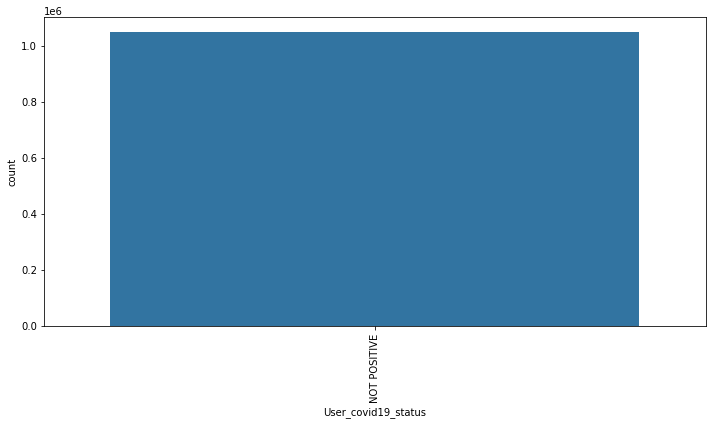

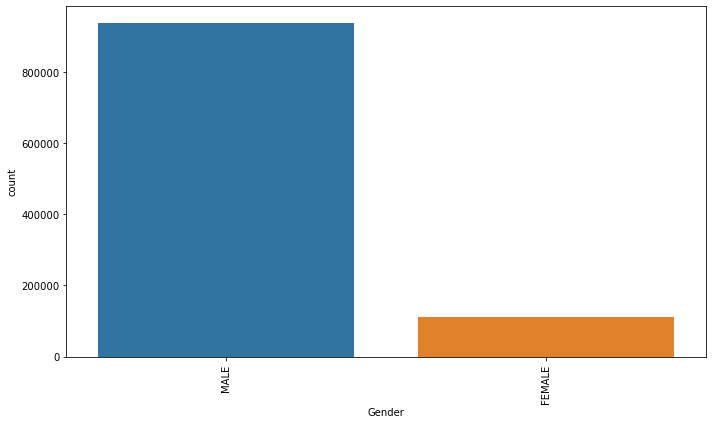

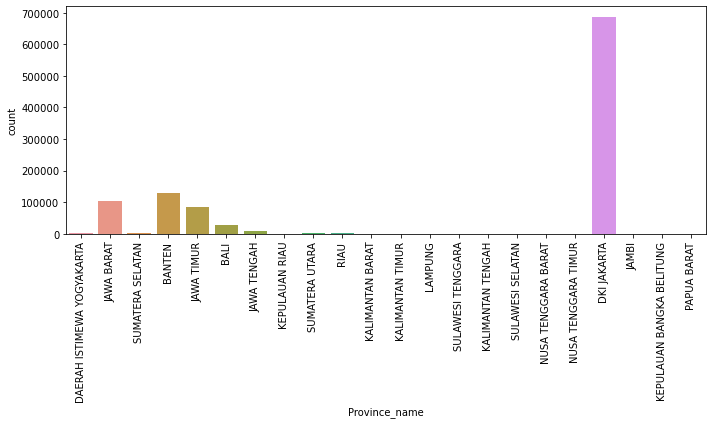

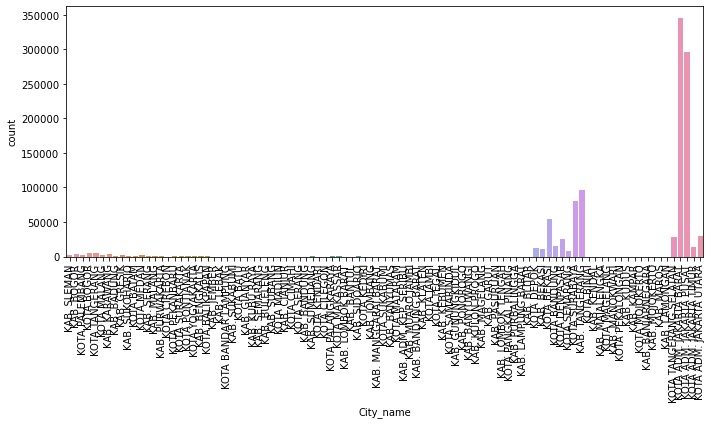

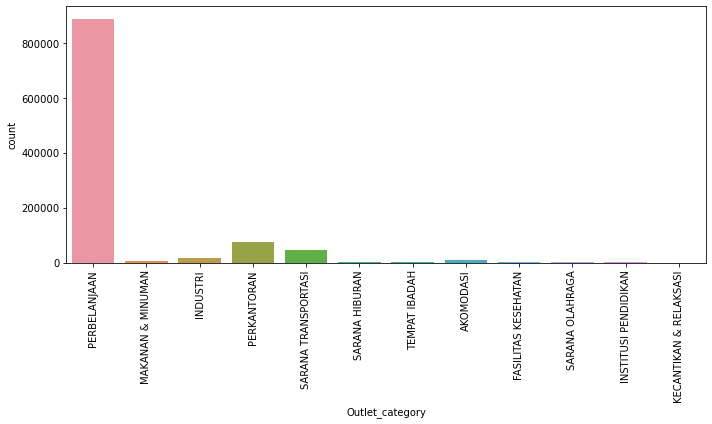

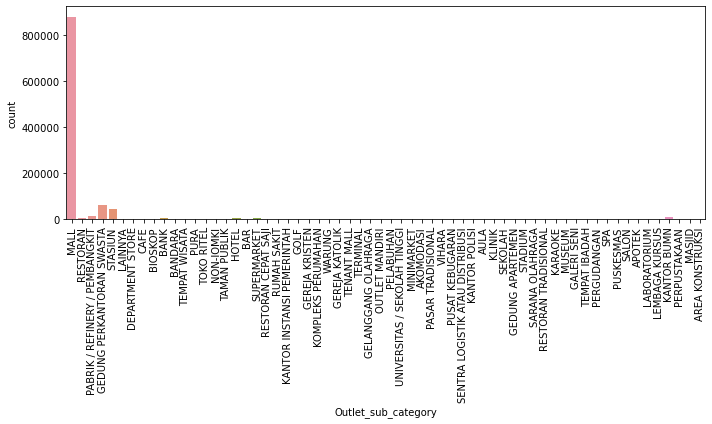

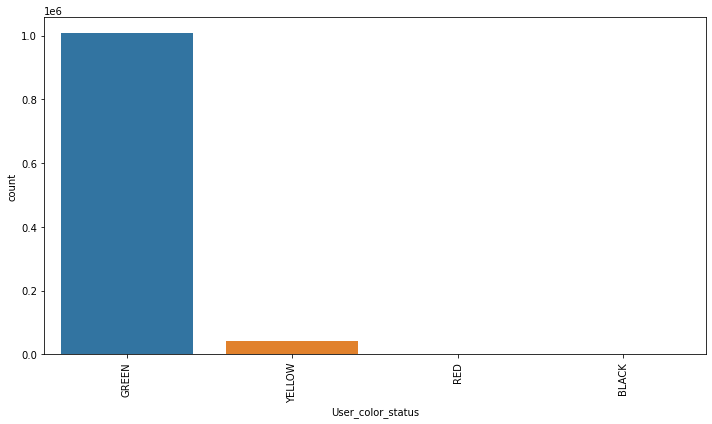

In [39]:
plot_all_hist(df_clean, clean_obj)

In [40]:
my_pivot = df_pl.pivot_table(index = 'checkin_tanggal', 
                          columns = 'user_color_status', 
                          fill_value = 0, 
                          aggfunc={'user_color_status':len})['user_color_status']

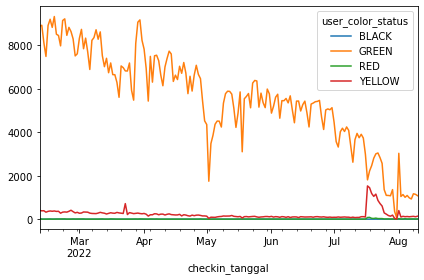

In [41]:
my_pivot.plot.line()
plt.tight_layout()
plt.show()

## Preprocessing Data

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
for column in clean_obj:
    df_clean[column] = le.fit_transform(df_clean[column])


In [44]:
le = LabelEncoder()
for column in date_cols:
    df_clean[column] = le.fit_transform(df_clean[column])

In [45]:
df_clean.head()

,user_covid19_status,gender,checkin_timestamp,province_name,city_name,outlet_category,outlet_sub_category,user_color_status,checkin_tanggal
0,0,1,317082,2,48,6,27,1,46
1,0,0,317106,5,11,5,41,1,46
2,0,1,317418,20,82,6,27,1,46
3,0,1,317431,2,48,6,27,1,46
4,0,1,317458,5,65,6,27,1,46


In [46]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   user_covid19_status  1048575 non-null  int32
 1   gender               1048575 non-null  int32
 2   checkin_timestamp    1048575 non-null  int32
 3   province_name        1048575 non-null  int32
 4   city_name            1048575 non-null  int32
 5   outlet_category      1048575 non-null  int32
 6   outlet_sub_category  1048575 non-null  int32
 7   user_color_status    1048575 non-null  int32
 8   checkin_tanggal      1048575 non-null  int64
dtypes: int32(8), int64(1)
memory usage: 40.0 MB


In [47]:
df_clean['user_color_status'].value_counts()

1    1006944
3      40722
2        861
0         48
Name: user_color_status, dtype: int64

In [48]:
df_clean.corr()

,user_covid19_status,gender,checkin_timestamp,province_name,city_name,outlet_category,outlet_sub_category,user_color_status,checkin_tanggal
user_covid19_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,1.000000,0.002944,0.024093,0.016198,-0.181225,-0.136217,0.043154,0.003844
checkin_timestamp,NaN,0.002944,1.000000,-0.020421,-0.012991,-0.007982,0.000265,0.046100,0.995372
province_name,NaN,0.024093,-0.020421,1.000000,0.318539,-0.085080,-0.010351,0.102253,-0.018954
city_name,NaN,0.016198,-0.012991,0.318539,1.000000,0.126221,0.037642,0.100139,-0.011743
outlet_category,NaN,-0.181225,-0.007982,-0.085080,0.126221,1.000000,0.344109,-0.019664,-0.008965
outlet_sub_category,NaN,-0.136217,0.000265,-0.010351,0.037642,0.344109,1.000000,-0.004138,0.000024
user_color_status,NaN,0.043154,0.046100,0.102253,0.100139,-0.019664,-0.004138,1.000000,0.056560
checkin_tanggal,NaN,0.003844,0.995372,-0.018954,-0.011743,-0.008965,0.000024,0.056560,1.000000


In [49]:
df_clean.corr() >0.1

,user_covid19_status,gender,checkin_timestamp,province_name,city_name,outlet_category,outlet_sub_category,user_color_status,checkin_tanggal
user_covid19_status,False,False,False,False,False,False,False,False,False
gender,False,True,False,False,False,False,False,False,False
checkin_timestamp,False,False,True,False,False,False,False,False,True
province_name,False,False,False,True,True,False,False,True,False
city_name,False,False,False,True,True,True,False,True,False
outlet_category,False,False,False,False,True,True,True,False,False
outlet_sub_category,False,False,False,False,False,True,True,False,False
user_color_status,False,False,False,True,True,False,False,True,False
checkin_tanggal,False,False,True,False,False,False,False,False,True


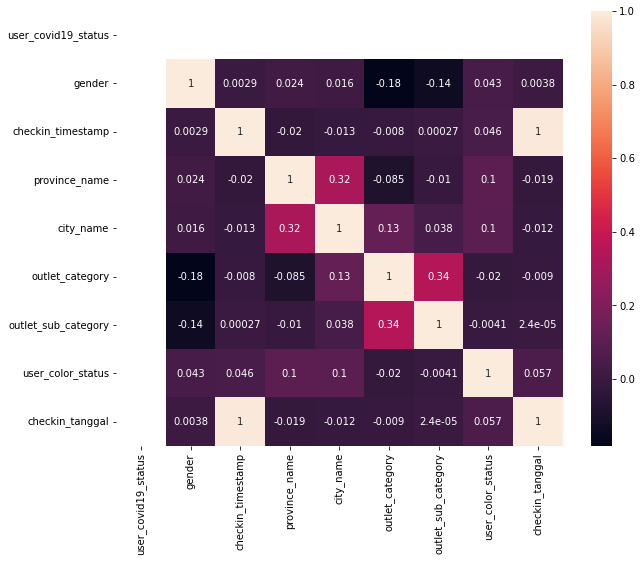

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True)
plt.show()

In [55]:
hight_corr = ['checkin_tanggal','checkin_timestamp','gender','outlet_category','outlet_sub_category','user_color_status']

df_clean[hight_corr].corr()

,checkin_tanggal,checkin_timestamp,gender,outlet_category,outlet_sub_category,user_color_status
checkin_tanggal,1.000000,0.995372,0.003844,-0.008965,0.000024,0.056560
checkin_timestamp,0.995372,1.000000,0.002944,-0.007982,0.000265,0.046100
gender,0.003844,0.002944,1.000000,-0.181225,-0.136217,0.043154
outlet_category,-0.008965,-0.007982,-0.181225,1.000000,0.344109,-0.019664
outlet_sub_category,0.000024,0.000265,-0.136217,0.344109,1.000000,-0.004138
user_color_status,0.056560,0.046100,0.043154,-0.019664,-0.004138,1.000000


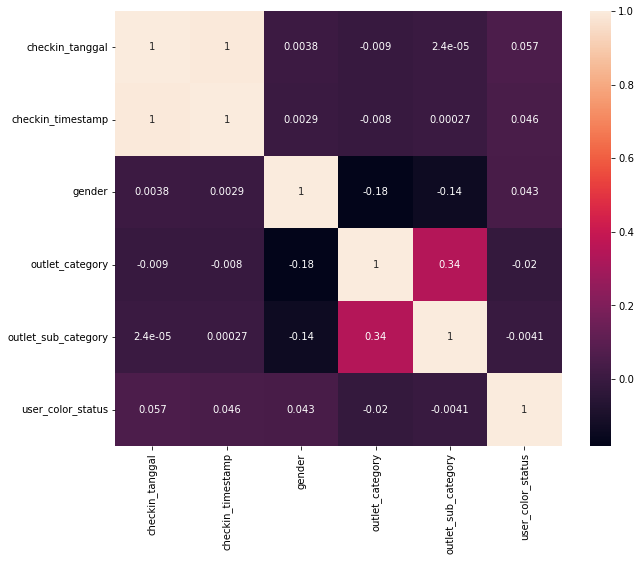

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[hight_corr].corr(), annot=True)
plt.show()

Dari kolom-kolom tersebut kami membuat beberapa Hypotesis, yaitu:

1. Gender berpengaruh secara positif terhadap status warna
2. Outlet lokasi checkin berpengaruh secara negatif terhadap status warna
3. Tanggal dan waktu checkin berpengaruh secara positif terhadap status warna


Maka, saya menyimpulkan:
1. Perbedaan gender dapat menunjukkan ketaatan/kepatuhan terhadap protokol kesehatan yang ditentukan. Hal ini ditunjukkan dengan status warna pengguna, yang sudah kami jabarkan sebelumnya
2. Tanggal dan waktu saat checkin juga berpengaruh dalam artian, misalkan pada tanggal dan waktu di hari yang sibuk misalkan pada hari Senin pagi, maka kemungkinan pengguna akan berkontak dengan pasien tanpa gejala atau pasien covid tak terdeteksi menjadi semakin tinggi. Namun kategori outlet ternyata berpengaruh negatif terhadap status warna, yang berarti kemungkinan untuk berkontak dengan virus covid 19 adalah sama di setiap tempat dengan banyak orang